<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded.


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride.

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones
* Visualize results on a nice dashboard

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here:

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Clustering is your friend

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly`

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well.


### Start small grow big

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach.

## Deliverable 📬

To complete this project, your team should:

* Have a map with hot-zones using any python library (`plotly` or anything else).
* You should **at least** describe hot-zones per day of week.
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan.

Your maps should look something like this:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

In [1]:
%matplotlib inline


In [2]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import plotly.express as px
import plotly.io as pio

### Visualisation d'un premier dataset

In [3]:
taxi=pd.read_csv('taxi-zone-lookup.csv')
taxi.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [4]:
# Basic stats
print("Number of rows : {}".format(taxi.shape[0]))
print()

print("Display of dataset: ")
display(taxi.head())
print()

print("Basics statistics: ")
taxi_desc = taxi.describe(include="all")
display(taxi_desc)
print()

print("Percentage of missing values: ")
display(100 * taxi.isnull().sum() / taxi.shape[0])

Number of rows : 265

Display of dataset: 


,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights



Basics statistics: 


,LocationID,Borough,Zone
count,265.000000,265,265
unique,NaN,7,261
top,NaN,Queens,Governor's Island/Ellis Island/Liberty Island
freq,NaN,69,3
mean,133.000000,NaN,NaN
std,76.643112,NaN,NaN
min,1.000000,NaN,NaN
25%,67.000000,NaN,NaN
50%,133.000000,NaN,NaN
75%,199.000000,NaN,NaN



Percentage of missing values: 


,0
LocationID,0.0
Borough,0.0
Zone,0.0


 ### Visualisation d'un second dataset, relatif aux trajets du mois d'avril 2014, pour démarrer

In [5]:
apr_14=pd.read_csv('/content/uber-raw-data-apr14.csv')
apr_14.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
# Basic stats
print("Number of rows : {}".format(apr_14.shape[0]))
print()

print("Display of apr_14set: ")
display(apr_14.head())
print()

print("Basics statistics: ")
apr_14_desc = apr_14.describe(include="all")
display(apr_14_desc)
print()

print("Percentage of missing values: ")
display(100 * apr_14.isnull().sum() / apr_14.shape[0])

Number of rows : 564516

Display of apr_14set: 


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512



Basics statistics: 


,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN



Percentage of missing values: 


,0
Date/Time,0.0
Lat,0.0
Lon,0.0
Base,0.0


## Constat : Données de Date/time à traiter, coordonnées GPS et numéro de Base de prise en charge.

### Retraitement de la date sur apr_14 pour extraire jour et heures, le mois et l'année étant inutiles à ce stade

In [7]:
apr_14['Date/Time'] = pd.to_datetime(apr_14['Date/Time'])

In [8]:
apr_14['day_of_week'] = apr_14['Date/Time'].dt.day_name()
apr_14['hour'] = apr_14['Date/Time'].dt.hour

In [9]:
apr_14.head()

,Date/Time,Lat,Lon,Base,day_of_week,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,0


In [10]:
apr_14 = apr_14.drop(['Date/Time', 'Base'], axis=1)

In [11]:
apr_14.head()

,Lat,Lon,day_of_week,hour
0,40.7690,-73.9549,Tuesday,0
1,40.7267,-74.0345,Tuesday,0
2,40.7316,-73.9873,Tuesday,0
3,40.7588,-73.9776,Tuesday,0
4,40.7594,-73.9722,Tuesday,0


In [12]:
# Basic stats
print("Number of rows : {}".format(apr_14.shape[0]))
print()

print("Display of apr_14set: ")
display(apr_14.head())
print()

print("Basics statistics: ")
apr_14_desc = apr_14.describe(include="all")
display(apr_14_desc)
print()

print("Percentage of missing values: ")
display(100 * apr_14.isnull().sum() / apr_14.shape[0])

Number of rows : 564516

Display of apr_14set: 


,Lat,Lon,day_of_week,hour
0,40.7690,-73.9549,Tuesday,0
1,40.7267,-74.0345,Tuesday,0
2,40.7316,-73.9873,Tuesday,0
3,40.7588,-73.9776,Tuesday,0
4,40.7594,-73.9722,Tuesday,0



Basics statistics: 


,Lat,Lon,day_of_week,hour
count,564516.000000,564516.000000,564516,564516.000000
unique,NaN,NaN,7,NaN
top,NaN,NaN,Wednesday,NaN
freq,NaN,NaN,108631,NaN
mean,40.740005,-73.976817,NaN,14.465043
std,0.036083,0.050426,NaN,5.873925
min,40.072900,-74.773300,NaN,0.000000
25%,40.722500,-73.997700,NaN,10.000000
50%,40.742500,-73.984800,NaN,16.000000
75%,40.760700,-73.970000,NaN,19.000000



Percentage of missing values: 


,0
Lat,0.0
Lon,0.0
day_of_week,0.0
hour,0.0


### Clean des outliers avec coordonnées GPS de NY.

In [13]:
lat_min, lat_max = 40.5, 40.92
lon_min, lon_max = -74.25, -73.7

# Filtrage
apr_14_clean = apr_14[
    (apr_14['Lat'] >= lat_min) & (apr_14['Lat'] <= lat_max) &
    (apr_14['Lon'] >= lon_min) & (apr_14['Lon'] <= lon_max)
].copy()

print(f"Nombre de trajets conservés : {len(apr_14_clean)} / {len(apr_14)}")

Nombre de trajets conservés : 562097 / 564516


In [14]:
apr_14_clean_sample = apr_14_clean.sample(n = 20000, random_state = 42)
apr_14_clean_sample.head()

,Lat,Lon,day_of_week,hour
454008,40.7249,-73.9969,Thursday,18
3228,40.7557,-73.9762,Thursday,17
528235,40.7592,-73.9946,Monday,7
77078,40.7394,-73.9920,Wednesday,9
316142,40.7320,-73.7959,Tuesday,4


### Visualisation d'une heatmap sur les trajets triés par jour et heure sur le mois sur l'échantillon

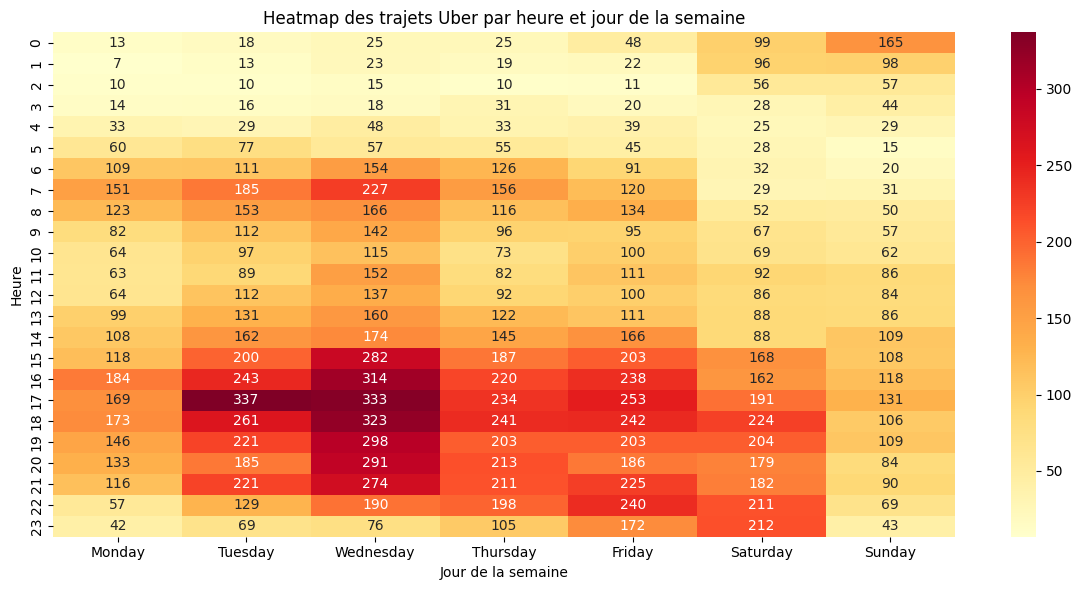

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


grouped = apr_14_clean_sample.groupby(['day_of_week', 'hour']).size().reset_index(name='ride_count')

from pandas.api.types import CategoricalDtype
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # On définit l'ordre des jours
apr_14_clean_sample['day_of_week'] = apr_14_clean_sample['day_of_week'].astype(CategoricalDtype(categories=days_order, ordered=True))
grouped['day_of_week'] = grouped['day_of_week'].astype(CategoricalDtype(categories=days_order, ordered=True))

# Pivot pour la heatmap
pivot = grouped.pivot(index='hour', columns='day_of_week', values='ride_count')

# Affichage de la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='g')
plt.title("Heatmap des trajets Uber par heure et jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Heure")
plt.tight_layout()
plt.show()


## La Heatmap montre que les pics d'activité sont les suivants :
- La matinée entre 6h et 9h pour les jours de la semaine
- Les après-midi principalement entre 14h et 22h avec notamment une densité accrue le mercredi entre 15h et 21h.

Je note également que le vendredi conserve une activité constante en fin de journée, jusqu'à 23h.

Le samedi se concentre entre 15h jusqu'au dimanche minuit.

Ces chiffres mettent en avant les besoins de clients notamment pour les trajets professionnels les matins comme pour les horaires de sortie de bureaux.
L'activité les vendredi et samedi soir laissent à penser que les clients ont également des besoins pour des loisirs notammment.

## Première visualisation sur Kmeans, sur la base des coordonnées du point le plus chaud : le mardi à 17h.

In [16]:
apr_14_tue = apr_14_clean[(apr_14_clean['day_of_week'] == 'Tuesday') & (apr_14_clean['hour'] == 17)].copy()
apr_14_tue

,Lat,Lon,day_of_week,hour
634,40.7591,-73.9670,Tuesday,17
635,40.7701,-73.9625,Tuesday,17
636,40.7789,-73.9559,Tuesday,17
637,40.7789,-73.9559,Tuesday,17
638,40.7330,-73.9824,Tuesday,17
...,...,...,...,...
563754,40.7748,-73.9771,Tuesday,17
563755,40.7589,-73.9706,Tuesday,17
563756,40.7364,-73.9988,Tuesday,17
563757,40.7241,-74.0009,Tuesday,17


### Démarrage de K-means

In [17]:
from sklearn.cluster import KMeans

# Sélection des coordonnées comme référence
coords = apr_14_tue[['Lat', 'Lon']]


In [18]:
wcss =  []
for i in range (2,30):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)

print(wcss)

[11.110109450089587, 7.015974193214838, 5.480863814886067, 4.444402619905354, 3.785632157969288, 2.4784464312522414, 2.0413835520739188, 1.9665478809459915, 1.7295705464552296, 1.6046675320170884, 1.5082674286805742, 1.2673571253805826, 1.1671509321055704, 1.0282441330328522, 0.9593962503346459, 0.8874663611601661, 0.8494071646098243, 0.8138268427176032, 0.7796610924358803, 0.7946620295343039, 0.7337999581451397, 0.6970707966693501, 0.6310537957076767, 0.6173939775041275, 0.5847831338434903, 0.5499500956556426, 0.5334297590441915, 0.5177641679545557]


In [19]:
pio.renderers.default = "colab"
fig = px.line(x = range(2,30), y = wcss)
fig.show()

In [20]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters
s_score = []
k = range(2, 30)  # Define k here
for i in k:  # Iterate through k directly
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(coords)
    s_score.append(silhouette_score(coords, kmeans.predict(coords)))

print(s_score)


# Create a data frame
cluster_scores = pd.DataFrame(s_score, columns=['Silhouette Score']) # Use s_score and provide a column name
#k_frame = pd.Series(k)  # k is already defined

# Create figure
fig = px.bar(data_frame=cluster_scores,
             x=k,
             y='Silhouette Score'  # Refer to the column name
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() # if using workspace

[np.float64(0.7763999545199166), np.float64(0.446239230026233), np.float64(0.452414360612009), np.float64(0.4824869123265845), np.float64(0.48789055850075086), np.float64(0.4090317308319074), np.float64(0.42930630062424646), np.float64(0.4305116806922829), np.float64(0.40803761842610514), np.float64(0.4197437854622631), np.float64(0.37444485527102317), np.float64(0.38251588410034654), np.float64(0.3913497315526065), np.float64(0.4209153323644805), np.float64(0.41142885991975814), np.float64(0.3952488993005466), np.float64(0.4136701328351863), np.float64(0.400997173753858), np.float64(0.3812850979845679), np.float64(0.3988710776791964), np.float64(0.39109781391427245), np.float64(0.3989144125694545), np.float64(0.39957303891334095), np.float64(0.384551204048351), np.float64(0.39402154437218523), np.float64(0.3916593437542351), np.float64(0.3886680024352411), np.float64(0.3876934811883438)]


### D'après les 2 précédentes visualisations, il apparaît comme valable de déterminer 7 clusters

In [21]:
# Clusters fixés après wcss pour le test et Silhouette Score

kmeans = KMeans(n_clusters=7, random_state=42)
apr_14_tue['clusterKmeans'] = kmeans.fit_predict(coords)


In [22]:
# Visualisation sur carte
fig = px.scatter_mapbox(apr_14_tue, lat="Lat", lon="Lon", color="clusterKmeans", height = 1000,
                        zoom=9,
                        mapbox_style="carto-positron")
fig.show()


### Les clusters définis dans Kmeans mettent en avant des zones distinctes :
  - Le Sud de Manhattan (cluster 0)
  - Le Centre de Manhattan (cluster 2)
  - Le Nord de Manhattan avec notamment une concentration dans la moitié sud de Central Park (cluster 4)
  - Les aéroports de La Guardia (cluster 1), JFK (cluster 3), et Newark (cluster 5)

Cela parait tout à fait pertinent compte-tenu du jour et de l'heure choisis.
En effet, cela met en avant les actifs de Manhattan ainsi que les affluences aux différents aéroports.
Les clusters 0, 2 et 4 sont donc très denses et sont les plus importants.

## Seconde visualisation sur DBScan selon les coordonnées

In [23]:
from sklearn.cluster import DBSCAN
import numpy as np

X = apr_14_tue[['Lat', 'Lon']]

db = DBSCAN(eps=0.008, min_samples=10, metric="manhattan")
db.fit(X)

np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [24]:
apr_14_tue["clusterDB"] = db.labels_
apr_14_tue.head()

,Lat,Lon,day_of_week,hour,clusterKmeans,clusterDB
634,40.7591,-73.9670,Tuesday,17,4,0
635,40.7701,-73.9625,Tuesday,17,4,0
636,40.7789,-73.9559,Tuesday,17,4,0
637,40.7789,-73.9559,Tuesday,17,4,0
638,40.7330,-73.9824,Tuesday,17,0,0


In [25]:
apr_14_tue.shape

(8272, 6)

In [26]:
fig = px.scatter_mapbox(
        apr_14_tue[apr_14_tue.clusterDB != -1], # Mask pour traiter les outliers
        lat="Lat",
        lon="Lon",
        color="clusterDB",
        height = 1000,
        mapbox_style="carto-positron"
)

fig.show()


### Avec les paramètres saisis dans DBScan, les clusters définis mettent en avant des clusters plus simples et ayant traité plus d'outliers :

- Manhattan est regroupé dans sa globalité (cluster 0)
- Les 3 aéroports (clusters 1, 3 et 4)



## Maintenant, étendons les modèles sur des données plus complètes

## 1) Commençons par regrouper les moments de la journée du mardi selon la heatmap :
- La nuit : 23h à 5h
- Le début de journée : 6h à 14h
- La fin de journée : 15h à 22h

Commençons par sélectionner l'horaire 15h-22h

In [27]:
apr_14_tue_evening = apr_14_clean[(apr_14_clean['day_of_week'] == 'Tuesday') & (apr_14_clean['hour'].between(17, 22))].copy()
apr_14_tue_evening

,Lat,Lon,day_of_week,hour
634,40.7591,-73.9670,Tuesday,17
635,40.7701,-73.9625,Tuesday,17
636,40.7789,-73.9559,Tuesday,17
637,40.7789,-73.9559,Tuesday,17
638,40.7330,-73.9824,Tuesday,17
...,...,...,...,...
563897,40.7111,-74.0160,Tuesday,22
563898,40.7631,-73.9719,Tuesday,22
563899,40.7713,-73.9832,Tuesday,22
563900,40.6857,-73.9836,Tuesday,22


In [28]:
# Sélection des coordonnées comme référence
coords = apr_14_tue_evening[['Lat', 'Lon']]

In [29]:
wcss =  []
for i in range (2,30):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)

print(wcss)

[55.183677542676605, 38.042958248798996, 31.713040307353566, 22.407175491710532, 14.849512333286835, 13.487004127727715, 10.885635504284593, 10.24921034058463, 9.002101635792373, 7.411085748102333, 7.009173690146557, 6.615705373253915, 6.010140572956279, 5.711558818927844, 5.513035322084833, 5.117532044005632, 4.604678500010666, 4.245074341815979, 3.951405238911991, 3.7409275926602468, 3.5592992757951563, 3.4307587950099623, 3.2957782983098967, 3.114835862007437, 2.969610938286346, 2.842784693877377, 2.771945823629811, 2.718085147115116]


In [30]:
pio.renderers.default = "colab"
fig = px.line(x = range(2,30), y = wcss)
fig.show()

In [31]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters
s_score = []
k = range(2, 30)  # Define k here
for i in k:  # Iterate through k directly
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(coords)
    s_score.append(silhouette_score(coords, kmeans.predict(coords)))

print(s_score)


# Create a data frame
cluster_scores = pd.DataFrame(s_score, columns=['Silhouette Score']) # Use s_score and provide a column name
#k_frame = pd.Series(k)  # k is already defined

# Create figure
fig = px.bar(data_frame=cluster_scores,
             x=k,
             y='Silhouette Score'  # Refer to the column name
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() # if using workspace

[np.float64(0.37607151559800106), np.float64(0.4398802770565087), np.float64(0.4711061990935705), np.float64(0.47982239629378437), np.float64(0.5063490606491091), np.float64(0.5030723425437973), np.float64(0.4236509838906298), np.float64(0.4228258248958299), np.float64(0.43556429908107314), np.float64(0.368797600729315), np.float64(0.3907817983172437), np.float64(0.41555827231042114), np.float64(0.37509557515599945), np.float64(0.407463422584981), np.float64(0.37894271562254717), np.float64(0.3961238155840076), np.float64(0.39281875140560496), np.float64(0.39970604752506916), np.float64(0.40949407189090903), np.float64(0.39951909789842466), np.float64(0.39596251198141674), np.float64(0.38604220218059), np.float64(0.3814921709216653), np.float64(0.3957039720157002), np.float64(0.39268989167641316), np.float64(0.39747263074751477), np.float64(0.384185250993963), np.float64(0.3919812222281543)]


### De nouveau, le choix de 7 clusters paraît tout à fait judicieux, il sera donc appliqué.

In [32]:
# Clusters fixés après wcss pour le test et Silhouette Score

kmeans = KMeans(n_clusters=7, random_state=42)
apr_14_tue_evening['clusterKmeans'] = kmeans.fit_predict(coords)


In [33]:
# Visualisation sur carte
fig = px.scatter_mapbox(apr_14_tue_evening, lat="Lat", lon="Lon", color="clusterKmeans", height = 1000,
                        zoom=9,
                        mapbox_style="carto-positron")
fig.show()


### Le constat est similaire à la tranche horaire choisie précédemment avec néanmoins des clusters plus étendus en périphérie de Manhattan.
### Le coeur d'activité reste Manhattan notamment les centroides des clusters 0,3 et 6.
### Les aéoroports restent des zones à prendre en compte dans l'adaptation de la présence des chauffeurs UBER sur cette tranche horaire de 15h-22h.

### DBScan

In [34]:
X = apr_14_tue_evening[['Lat', 'Lon']]

db = DBSCAN(eps=0.008, min_samples=50, metric="manhattan")
db.fit(X)

np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [35]:
apr_14_tue_evening["clusterDB"] = db.labels_
apr_14_tue_evening.head()

,Lat,Lon,day_of_week,hour,clusterKmeans,clusterDB
634,40.7591,-73.9670,Tuesday,17,0,0
635,40.7701,-73.9625,Tuesday,17,0,0
636,40.7789,-73.9559,Tuesday,17,0,0
637,40.7789,-73.9559,Tuesday,17,0,0
638,40.7330,-73.9824,Tuesday,17,3,0


In [36]:
fig = px.scatter_mapbox(
        apr_14_tue_evening[apr_14_tue_evening.clusterDB != -1], # Mask pour traiter les outliers
        lat="Lat",
        lon="Lon",
        color="clusterDB",
        height = 1000,
        mapbox_style="carto-positron"
)

fig.show()


### DBScan confirme bien évidemment Manhattan et met en avant les clusters en périphérie suivants :
- Les 3 aéroports
- La zone de HOBOKEN à l'ouest
- Le quartier de WILLIAMSBURG
- Long Island City

### Continuons maintenant avec le découpage défini précédemment en analysant une journée complète basée sur le dataset apr_14_clean_sample. Je vais conserver les créneaux déterminés précédemment :
- La nuit : 23h à 5h
- Le début de journée : 6h à 14h
- La fin de journée : 15h à 22h

### Vérification du dataset

In [37]:
apr_14_clean_sample.head()

,Lat,Lon,day_of_week,hour
454008,40.7249,-73.9969,Thursday,18
3228,40.7557,-73.9762,Thursday,17
528235,40.7592,-73.9946,Monday,7
77078,40.7394,-73.9920,Wednesday,9
316142,40.7320,-73.7959,Tuesday,4


### Modification des créneaux

In [38]:
def get_tranche_horaire(h):
    if 0 <= h <= 5 or h == 23:
        return "Nuit"
    elif 6 <= h <= 14:
        return "Matin"
    elif 15 <= h <= 22:
        return "Soir"
    else:
        return "Inconnu"


# ATTENTION A NE PRENDRE QU'UNE SEULE JOURNEE

In [39]:
apr_14_clean_sample["tranche_horaire"] = apr_14_clean_sample["hour"].apply(get_tranche_horaire)
apr_14_clean_sample.head()


,Lat,Lon,day_of_week,hour,tranche_horaire
454008,40.7249,-73.9969,Thursday,18,Soir
3228,40.7557,-73.9762,Thursday,17,Soir
528235,40.7592,-73.9946,Monday,7,Matin
77078,40.7394,-73.9920,Wednesday,9,Matin
316142,40.7320,-73.7959,Tuesday,4,Nuit


In [40]:
apr_14_clean_sample_tuesday = apr_14_clean_sample[apr_14_clean_sample['day_of_week'] == 'Tuesday']
apr_14_clean_sample_tuesday.head()

,Lat,Lon,day_of_week,hour,tranche_horaire
316142,40.7320,-73.7959,Tuesday,4,Nuit
199570,40.6805,-73.9920,Tuesday,13,Matin
196824,40.7355,-73.9940,Tuesday,0,Nuit
107230,40.7437,-73.9717,Tuesday,7,Matin
201758,40.7633,-73.9726,Tuesday,17,Soir


In [41]:
apr_14_clean_sample_tuesday.shape

(3181, 5)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Positions des colonnes
numeric_features = [0, 1]  # Colonnes quantitatives
categorical_features = [4]    # Colonnes catégorielles

# Pipeline pour les colonnes quantitatives (sans transformation)
numeric_transformer = 'passthrough'

# Pipeline pour les colonnes catégorielles (avec OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine les deux dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Appliquer la transformation au dataset
print("Preprocessing sur le train set...")
print(apr_14_clean_sample.head())
X = preprocessor.fit_transform(apr_14_clean_sample_tuesday)
print("...Terminé.")
print(X[0:5, :])
print()


Preprocessing sur le train set...
            Lat      Lon day_of_week  hour tranche_horaire
454008  40.7249 -73.9969    Thursday    18            Soir
3228    40.7557 -73.9762    Thursday    17            Soir
528235  40.7592 -73.9946      Monday     7           Matin
77078   40.7394 -73.9920   Wednesday     9           Matin
316142  40.7320 -73.7959     Tuesday     4            Nuit
...Terminé.
[[ 40.732  -73.7959   1.       0.    ]
 [ 40.6805 -73.992    0.       0.    ]
 [ 40.7355 -73.994    1.       0.    ]
 [ 40.7437 -73.9717   0.       0.    ]
 [ 40.7633 -73.9726   0.       1.    ]]



In [43]:
# Utilisation de la méthode Elbow pour trouver le nombre optimal de clusters

wcss =  []
for i in range (2,40):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)


[202.22276181039575, 9.104439586139117, 8.093974244094733, 6.2680266946702305, 5.30938844957212, 4.752159189611992, 4.213506490869159, 3.7887779379270015, 3.23154867796688, 2.8841168027098747, 2.6113889733243236, 2.4390775068409263, 2.1036902832618685, 1.9253125866819836, 1.7591303644801473, 1.5329988533024752, 1.4188499742169103, 1.337407505809683, 1.233487224742264, 1.2393805167419505, 1.174041989988075, 1.0548117249205669, 1.044138774516527, 0.9848313987678593, 0.9526385059484525, 0.930466843021592, 0.8957429923853295, 0.8755205919951555, 0.8346116897837912, 0.8147801052103157, 0.7721274286648603, 0.7429543755339572, 0.71850525051338, 0.701902531462674, 0.6972210420438294, 0.6648852820191334, 0.6346409886094165, 0.6130525302316356]


In [44]:
pio.renderers.default = "colab"
fig = px.line(x = range(2,40), y = wcss)
fig.show()


In [45]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters
s_score = []
k = range(2, 40)  # Define k here
for i in k:  # Iterate through k directly
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X)))

print(s_score)


# Create a data frame
cluster_scores = pd.DataFrame(s_score, columns=['Silhouette Score']) # Use s_score and provide a column name
#k_frame = pd.Series(k)  # k is already defined

# Create figure
fig = px.bar(data_frame=cluster_scores,
             x=k,
             y='Silhouette Score'  # Refer to the column name
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() # if using workspace

[np.float64(0.8519863249582774), np.float64(0.9457729344738676), np.float64(0.7454025567526158), np.float64(0.6633306563128475), np.float64(0.4659220927567857), np.float64(0.553730332304953), np.float64(0.4819852984077607), np.float64(0.47736751024048385), np.float64(0.48173038909650717), np.float64(0.45866015390858383), np.float64(0.4099779082737917), np.float64(0.49608656929118167), np.float64(0.4763920135668977), np.float64(0.40282468343827277), np.float64(0.4885061880046662), np.float64(0.3876906346576403), np.float64(0.46676184821644073), np.float64(0.4162224628694084), np.float64(0.43154531839456955), np.float64(0.4016473577074966), np.float64(0.355070786518052), np.float64(0.4158763918111366), np.float64(0.41986228798875935), np.float64(0.3948766566231164), np.float64(0.4084520235158155), np.float64(0.4247654589322171), np.float64(0.4096534275363631), np.float64(0.3969933669236021), np.float64(0.37639537658729055), np.float64(0.3845591905695723), np.float64(0.3739563248004352), 

In [46]:
kmeans = KMeans(n_clusters = 3, random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [47]:
# Clusters fixés après wcss pour le test et Silhouette Score

kmeans = KMeans(n_clusters=3, random_state = 0)
apr_14_clean_sample_tuesday['clusterKmeans'] = kmeans.fit_predict(X)


<ipython-input-47-a04a80b2270c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
apr_14_clean_sample_tuesday.head()

,Lat,Lon,day_of_week,hour,tranche_horaire,clusterKmeans
316142,40.7320,-73.7959,Tuesday,4,Nuit,2
199570,40.6805,-73.9920,Tuesday,13,Matin,1
196824,40.7355,-73.9940,Tuesday,0,Nuit,2
107230,40.7437,-73.9717,Tuesday,7,Matin,1
201758,40.7633,-73.9726,Tuesday,17,Soir,0


In [56]:
import plotly.express as px

fig = px.scatter_mapbox(
    apr_14_clean_sample_tuesday,
    lat="Lat",
    lon="Lon",
    color=("tranche_horaire"),
    zoom=9,
    height=1000,
    mapbox_style="carto-positron",
    title="Clusters géographiques en couleurs et tranche horaire interactive",
    hover_data=["tranche_horaire", "hour", "day_of_week"]
)

fig.show()


### Les clusters regroupés sur la tranche horaire montrent que sur le créneau "nuit", l'activité se concentre plus dans Manhattan que sur le créneau 6h-14h.
### Le créneau "soir" reste le moment le plus important en terme d'activité des chauffeurs. Le nombre de courses augmente et s'étend un peu plus, notamment dans les aéroports.

### Tentons maintenant de définir les clusters par leur horaire précis

In [57]:

fig = px.scatter_mapbox(
    apr_14_clean_sample_tuesday,
    lat="Lat",
    lon="Lon",
    color=("hour"),
    zoom=9,
    height=1000,
    mapbox_style="carto-positron",
    title="Clusters horaires en couleurs",
    hover_data=["tranche_horaire", "hour", "day_of_week"]
)

fig.show()


### Cette méthode, bien que plus précise, montre ses limites au niveau de sa visibilité.

## Procédons avec DBScan

In [51]:
X = apr_14_clean_sample_tuesday[['Lat', 'Lon']]

db = DBSCAN(eps=0.008, min_samples=10, metric="manhattan")
db.fit(X)

np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4])

In [52]:
apr_14_clean_sample_tuesday["clusterDB"] = db.labels_
apr_14_clean_sample_tuesday.head()

<ipython-input-52-c0ebe5da3c46>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lat,Lon,day_of_week,hour,tranche_horaire,clusterKmeans,clusterDB
316142,40.7320,-73.7959,Tuesday,4,Nuit,2,-1
199570,40.6805,-73.9920,Tuesday,13,Matin,1,0
196824,40.7355,-73.9940,Tuesday,0,Nuit,2,0
107230,40.7437,-73.9717,Tuesday,7,Matin,1,0
201758,40.7633,-73.9726,Tuesday,17,Soir,0,0


In [53]:
fig = px.scatter_mapbox(
        apr_14_clean_sample_tuesday[apr_14_clean_sample_tuesday.clusterDB != -1], # Mask pour traiter les outliers
        lat="Lat",
        lon="Lon",
        color="tranche_horaire",
        height = 1000,
        mapbox_style="carto-positron"
)

fig.show()


### DBScan simplifie la lisibilité des clusters sur les moments de la journée.
### Il permet de confirmer ce qui a été mis en avant précédemment par Kmeans et traite plus facilement les outliers par les paramètres EPS et samples min

In [58]:
# Faire un dernier travail sur les tranches horaires et conclure sur les préconisations envers UBER